# HW 5

In [3]:
import matplotlib.pyplot as plt
import trees as t
import fun_one as fo
import fun_two as ft
import fun_four as ff

## 1. Data
We implemented all this part in the trees module but we want to say here a couple of things:
- we use dates considering only day-date-year, so when we convert timestamps we "discard" the time part;
- We have decided to ignore the "self-interaction" because we think interactions with oneself are not relevant;
- We choose different intervals of time in order to show significant results taking into account computational time.

## 2/3. Functionalities
Here we deal with the four functionalities

### Functionality 1
We build the graph and then we pass it to fun1 that computes all the stuff and return a table with results.
For "directed" graph we mean that each couple of nodes linked by an edge in one direction has also another link in the opposite direction

In [2]:
f = 'a2q'
graph = t.build(f, '2012-01-01', '2012-01-07')
print(graph)

DiGraph with 27076 nodes and 36458 edges


In [3]:
t = fo.fun1(graph)
t

,result
directed?,yes
N° of users,27076
N° of answers,36458
average,1.346506
density,0.0001
sparse?,yes


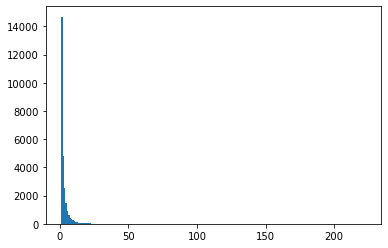

In [4]:
fo.plot_degree_dist(graph)

This is a "strange" graph but this is due to the high degrees of a very small number of nodes, for example: we have a node with degree of 224 and this makes plot "larger" to represent also this node, we could have decided not to represent it but we would have represented something that no longer corresponded to the original graph so we decided to not manipulate anything.

### Functionality 2
some theoretical hints:
##### Betweenness centrality
Let $n_{s,t}^{v}$ be the number of shortest paths from $s$ to $t$ that pass through $v$ and let $n_{s,t}$ be the total number of shortest paths from $s$ to $t$. Then the betweenness centrality of node $v$ is:

$\displaystyle{B(v) = \sum_{s, t} \frac{n_{s,t}^{v}}{n_{s,t}}}$

##### Closeness centrality
$C(v)={\frac  {N-1}{\sum _{u}d(u,v)}}$
- N is the number of total nodes in the graph
- $d(u,v)$ is the distance between the nodes u and v

##### Degree Centrality
$D(v)={\frac  {degree(v)}{N-1}}$

##### Page rank
First we create the matrix P using this formula:
$P={(1 - \alpha) * M + \alpha*P_{rw}}$
Where:
- $N$ is the number of nodes in the graph
- $M$ is a matrix $N*N$ with all components equal to $\frac{1}{N}$
- $P_{rw}$ is a matrix $N*N$ in which the components $a_{i,j}$ ,such that exist an edge between the node relative to $i$ row and the node relative to $j$ column, are given by the normalized weight of the edge. The nodes that do not have any outgoing edge, are such that their corresponding row in $P_{rw}$ has all columns equal to $\frac{1}{N}$

Note that we have used a different interval for the print of the betweenness because the running time of this metric is high, so we search for a time interval with maximum 100 nodes. Instead for the other metrics, we used a different time interval with 1500 nodes.

In [2]:
# Show the functionality two with betweenness metric
print(ft.fun2(49, "2008-08-01", "2008-08-04", "Betweeness"))

100%|██████████| 98/98 [00:03<00:00, 27.08it/s]

0.1268472906403941


In [3]:
# Show the functionality two with closeness metric
print(ft.fun2(3347, "2008-09-01", "2008-09-06", "ClosenessCentrality"))

100%|██████████| 1523/1523 [01:51<00:00, 13.62it/s]

0.25822870715982355


In [4]:
# Show the functionality two with pagerank metric
print(ft.fun2(3347, "2008-09-01", "2008-09-06", "PageRank", alpha=0.85, max_iter=100, tol = 0.000001))

 12%|█▏        | 12/100 [00:00<00:00, 127.06it/s]

the algorithm Page rank converges in  12 iterations
0.0010742618150226557


In [5]:
# Show the functionality two with degree centrality metric
print(ft.fun2(3347, "2008-09-01", "2008-09-06", "DegreeCentrality"))

0.01445466491458607


#### Visualization part

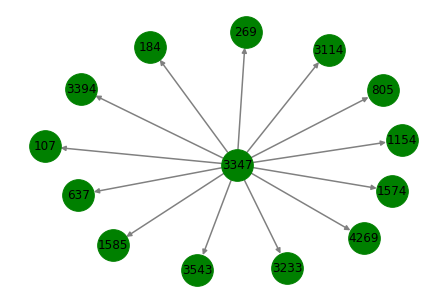

In [2]:
# Visualization of the importance of node 3347 used for the prints of the closeness, pagerank and degree scores
ft.vis2(3347, "2008-09-01", "2008-09-06")

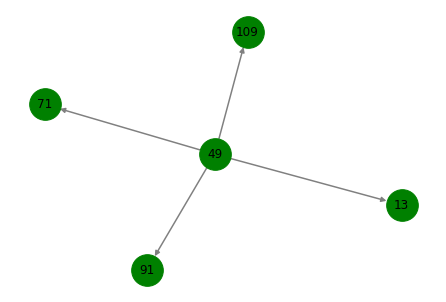

In [3]:
# Visualization of the importance of node 49 used for the prints of the betweennes
ft.vis2(49, "2008-08-01", "2008-08-04")

### Evolution of the Page rank and DegreeCentrality
- We split the interval from 1-09-2008 to 06-09-2008 into 3 intervals of two days each.
- We can see that the user 3347 has more pagerank score and degree centrality score in the second interval (3-4 september 2008)
- In addition, the user 3347 has smallest pagerank score in the third interval, and differently has the smallest degree score in the first interval

 11%|█         | 11/100 [00:00<00:00, 1414.21it/s]


the algorithm Page rank converges in  11 iterations


 20%|██        | 20/100 [00:00<00:00, 431.49it/s]


the algorithm Page rank converges in  20 iterations


 10%|█         | 10/100 [00:00<00:00, 793.25it/s]

the algorithm Page rank converges in  10 iterations
0.0014757649433329912  is the value of the Pagerank for 1-2 settembre 2008
0.0031540943459823024  is the value of the Pagerank for 3-4 settembre 2008
0.0007977482829770693  is the value of the Pagerank for 5-6 settembre 2008


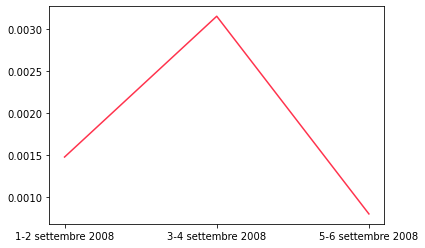

In [5]:
y = list()
i = ft.fun2(3347, "2008-09-01", "2008-09-02", "PageRank", alpha=0.85, max_iter=100, tol = 0.000001)
j = ft.fun2(3347, "2008-09-03", "2008-09-04", "PageRank", alpha=0.85, max_iter=100, tol = 0.000001)
z = ft.fun2(3347, "2008-09-05", "2008-09-06", "PageRank", alpha=0.85, max_iter=100, tol = 0.000001)

y.append(i)
y.append(j)
y.append(z)

print(i, " is the value of the Pagerank for 1-2 settembre 2008")
print(j, " is the value of the Pagerank for 3-4 settembre 2008")
print(z, " is the value of the Pagerank for 5-6 settembre 2008")


fig = plt.figure()
ax = plt.axes()

x = ["1-2 settembre 2008", "3-4 settembre 2008", "5-6 settembre 2008"]
ax.plot(x, y, color = (1.0,0.2,0.3));

0.0024330900243309003  is the value of the DegreeCentrality for 1-2 settembre 2008
0.016793893129770993  is the value of the DegreeCentrality for 3-4 settembre 2008
0.0046801872074883  is the value of the DegreeCentrality for 5-6 settembre 2008


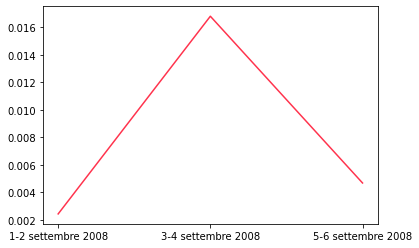

In [6]:
y = list()
i = ft.fun2(3347, "2008-09-01", "2008-09-02", "DegreeCentrality")
j = ft.fun2(3347, "2008-09-03", "2008-09-04", "DegreeCentrality")
z = ft.fun2(3347, "2008-09-05", "2008-09-06", "DegreeCentrality")

y.append(i)
y.append(j)
y.append(z)

print(i, " is the value of the DegreeCentrality for 1-2 settembre 2008")
print(j, " is the value of the DegreeCentrality for 3-4 settembre 2008")
print(z, " is the value of the DegreeCentrality for 5-6 settembre 2008")


fig = plt.figure()
ax = plt.axes()

x = ["1-2 settembre 2008", "3-4 settembre 2008", "5-6 settembre 2008"]
ax.plot(x, y, color = (1.0,0.2,0.3));

### Functionality 4

- The maximum flow and minimum cut theorem  says that, in a flow network, the maximum flow passing from the source to the target is equal to the sum of the weights of the edges in the minimum cut. Then, to find the minimum cut between two nodes, we consider the FordFulkerson algorithm, which returns the max flow of a graph.
- We build the algorithm such that while exists a path between the soruce and the target in input, we calculate the path flow as the minimum of the weight of the path edges, then we will subtract this path_flow to the edges that are in the path.  
- We count the number of edges that are in minimum cut considering the edges that have weight equal to 0 (as we have subtracted before path_flow to the edges in tha path).

In [2]:
print(ff.fun4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 1600, 136))

The nodes in input should be unique for each interval


In [4]:
print(ff.fun4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 3877, 357))

(('2008-09-04', '2008-09-06'),)


TypeError: strptime() argument 0 must be str, not <class 'tuple'>

## Algorithmic question

In [20]:
def solve(n, l):
    # Vedere sotto sistemare
    d = [0] * n

    for el in l:
        f = el[0] - 1
        s = el[1] -1
        if f == s:
            return ("A kid can't fight with himself")
        if d[f] == 0 and d[s] == 0:
            d[f] = 1
            d[s] = 2
        elif d[f] == 0:
            if d[s] == 1:
                d[f] = 2
            else:
                d[f] = 1
        elif d[s] == 0:
            if d[f] == 1:
                d[s] = 2
            else:
                d[s] = 1
        elif d[f] == d[s]: # Se sono già stati assegnati non possono esser cambiati
            return False

    return True

n = 10    
pairs_no = [(1,3), (3,4), (1,4)]
pairs_yes = [(1,2), (3,4), (4,5), (5,8), (1,10)]
print(solve(n, pairs_no))
print(solve(n, pairs_yes))

False
True
True
